In [4]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

FOCUS_GENES = ('SCN1A','SCN2A','KCNQ2', 'KCNQ3', 'CDKL5',
               'PCDH19', 'SCN1B', 'SCN8A', 'SLC2A1',
               'SPTAN1', 'STXBP1', 'TSC1')

def mk_class(row):
    if row['Classification'] in ('Benign', 'BENIGN', 'LIKELY BENIGN'):
        return 'B'
    elif row['Classification'] in ('PATHOGENIC', 'LIKELY PATHOGENIC', 'Reduced function allele'):
        return 'P'
    elif row['Classification'] == 'VOUS':
        return 'V'
    else:
        print(row['Classification'])
        i = 1/0
        
afile = '../data/interim/clinvar/clinvar.limit2.dat'
df = pd.read_csv(afile, sep='\t')
focus = df[ df.apply(lambda row: str(row['gene']) in FOCUS_GENES and row['clin_class'] != -1, axis=1) ]
ss = focus.groupby(['gene', 'clin_class']).size().reset_index().rename(columns={0:'size'})

In [5]:
ss.head()

,gene,clin_class,size
0,CDKL5,0,52
1,CDKL5,1,161
2,KCNQ2,0,66
3,KCNQ2,1,125
4,KCNQ3,0,24


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

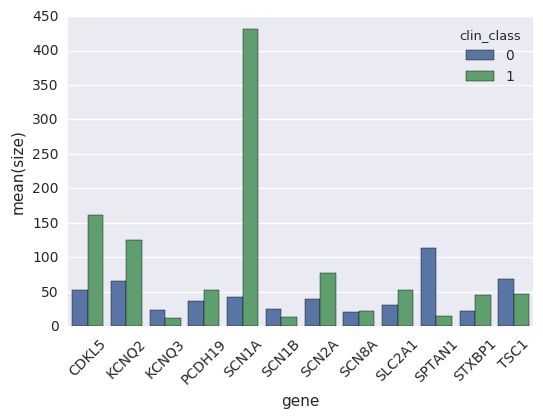

In [7]:
sns.barplot(x='gene', y='size', hue='clin_class', data=ss)
plt.xticks(rotation=45)